
# == CNN From Scratch for binary Classification ==

In [ ]:
# Computational Intelligence Project
# Dipartimento di Ingegneria dell´Informazione , Universita´ di Pisa
# Authors: Rachele Nebbia Colomba, Alessandro Gentili, Giorgio Simonini
#    begin                : June 2020
#    copyright            : (C)  2020 Universita´ di pisa    
#    email                : rachelenebbia <at> gmail <dot> com



# Libraries import
#Tensorflow_version 1.x

import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
print(keras.__version__)
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import os
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
from google.colab import drive
from tensorflow.keras.models import load_model

In [ ]:
# Function to shuffle images
def mischia(img,lab):
    z=list(zip(img,lab)) #zip returns an iterator instead and needs to be passed to a list function to get the zipped tuples
    rnd.shuffle(z)       #random shuffle of the tuples
    img2,lab2=zip(*z)    #unzipping, it obtaines the original form 
    img2=np.asarray(img2)
    lab2=np.asarray(lab2)
    return img2,lab2

In [ ]:
# Import data
drive.mount('/content/drive/')
dir_numpy ="/content/drive/My Drive/Computational/numpy data"
dir_nets ="/content/drive/My Drive/Computational/networks"
dir_check ="/content/drive/My Drive/Computational/networks"

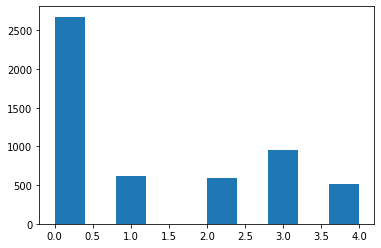

5352 images


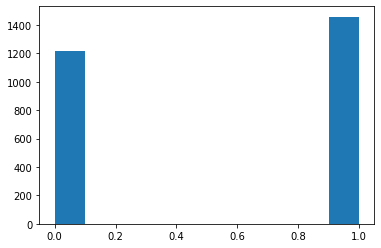

2676 images


In [ ]:
#load the training and testing dataset imgs+labels
train_img = np.load(os.path.join(dir_numpy,'train_tensor.npy'))
train_lab = np.load(os.path.join(dir_numpy,'train_labels.npy'))
test_img = np.load(os.path.join(dir_numpy,'public_test_tensor.npy'))
test_lab = np.load(os.path.join(dir_numpy,'public_test_labels.npy'))

# print hystogram representing classes distribution of DataSet
plt.hist(train_lab)
plt.show()
print(len(train_lab), "images")

# define new tensors to classifiy between  masses and calcifications 
n_img=len(train_img)
train_img_21=train_img[1:n_img:2]
n_img_test=len(test_img)
test_img_21=test_img[1:n_img_test:2]

# order labels
train_lab_21=train_lab[1:n_img:2]
test_lab_21=test_lab[1:n_img_test:2]
n_img21=len(train_img_21)
for i in range(0,n_img21):
    if ((train_lab_21[i] == 1) or (train_lab_21[i] == 2)):
        train_lab_21[i] = 0
    elif ((train_lab_21[i] == 3) or (train_lab_21[i] == 4)):
        train_lab_21[i] = 1
n_img21_test=len(test_img_21)
for i in range(0,n_img21_test):
    if ((test_lab_21[i] == 1) or (test_lab_21[i] == 2)):
        test_lab_21[i] = 0
    elif ((test_lab_21[i] == 3) or (test_lab_21[i] == 4)):
        test_lab_21[i] = 1
        
# Plot train dataset distribution 
plt.hist(train_lab_21)
plt.show()
print(len(train_lab_21), "images")

In [ ]:
# Design of the From-Scratch Convolutional Neural Netwoek
# model = neural network, here we add the layers 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary() #print out model summary 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 128)      

In [ ]:
# Compile the model
# use: binary_crossentropy loss and adams optimizer
# dfine accuracy as metrics 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

float32


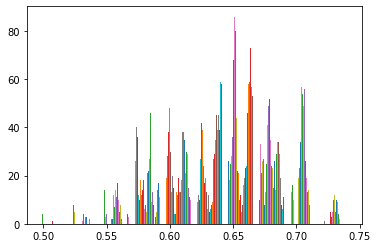

(336, 150, 150, 1)

In [ ]:

# Normalise the training and testing dataset
train_img_21 = train_img_21.astype('float32') / 65535
test_img_21 = test_img_21.astype('float32') / 65535

#Plot the distribution 
print(train_img_21[5,:].dtype) # check the type
plt.hist(train_img_21[5,:]) # check the value range and the distribution
plt.show()

# reshape
train_img_21 = train_img_21.reshape((n_img21, 150, 150, 1))
test_img_21 = test_img_21.reshape((n_img21_test, 150, 150, 1))

test_img_21.shape

In [ ]:
# execute to shape into the vector 
train_lab_21.shape

(2676,)

In [ ]:
# Check after shaping the class label for the first 100 samples: e.g 0 = baseline patches 
train_lab_21.shape
print(train_lab_21[0:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# uses "mischia function" to mix the labels and have random distributions of the classes in the dataset 
train_img_21, train_lab_21 = mischia(train_img_21, train_lab_21)
train_lab_21.shape
print(train_lab_21[0:100])

NameError: ignored

In [ ]:
## Define the Neural Network parameters 
## spli into validation sample 
file_check ="/content/drive/My Drive/Computational/networks/checkpoint21"
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)
checkpoint = ModelCheckpoint(file_check, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit(train_img_21, 
                    train_lab_21, 
                    epochs=40, 
                    batch_size=228,
                    validation_split=0.15,
                    shuffle = True,
                    callbacks=[checkpoint])

Train on 2274 samples, validate on 402 samples
Epoch 1/40
2052/2274 [==========================>...] - ETA: 0s - loss: 0.6925 - acc: 0.5404
Epoch 00001: val_acc improved from -inf to 0.56219, saving model to /content/drive/My Drive/Computational/networks/checkpoint21
2274/2274 [==============================] - 5s 2ms/sample - loss: 0.6924 - acc: 0.5387 - val_loss: 0.6866 - val_acc: 0.5622
Epoch 2/40
2052/2274 [==========================>...] - ETA: 0s - loss: 0.6911 - acc: 0.5331
Epoch 00002: val_acc did not improve from 0.56219
2274/2274 [==============================] - 3s 1ms/sample - loss: 0.6906 - acc: 0.5418 - val_loss: 0.6892 - val_acc: 0.5622
Epoch 3/40
2052/2274 [==========================>...] - ETA: 0s - loss: 0.6906 - acc: 0.5380
Epoch 00003: val_acc did not improve from 0.56219
2274/2274 [==============================] - 3s 1ms/sample - loss: 0.6899 - acc: 0.5418 - val_loss: 0.6852 - val_acc: 0.5622
Epoch 4/40
2052/2274 [==========================>...] - ETA: 0s - loss:

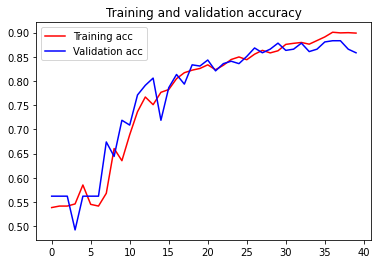

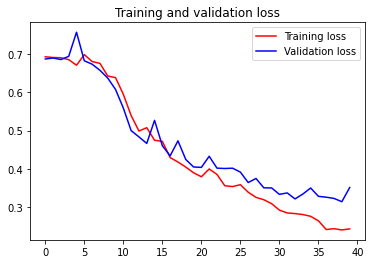

In [ ]:
## Compare training and validation accuracy and loss
## Plot figures of the obtained results 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
## Print test accuracy and loss
test_loss, test_acc = model.evaluate(test_img_21, test_lab_21)

336/336 [==============================] - 0s 511us/sample - loss: 0.4876 - acc: 0.8125


In [ ]:

ckmodel = load_model(os.path.join(dir_check,"checkpoint21"))

In [ ]:
## Evaluate test accuracy and loss until check point
test_loss, test_acc = ckmodel.evaluate(test_img_21, test_lab_21)

336/336 [==============================] - 0s 1ms/sample - loss: 0.4298 - acc: 0.8304


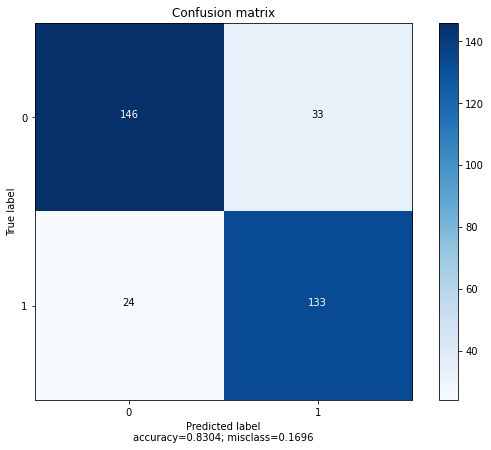

In [ ]:
# Result evaluation: Print confusion Matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
#Plotting of the Matrix confusion
def plot_confusion_matrix(cm,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
 
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    cmap = plt.get_cmap('Blues')
 
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xticks(range(0,2),)
    plt.yticks(range(0,2),)
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
 
y_pred=ckmodel.predict(test_img_21)
for i in range(len(test_lab_21)):
  if y_pred[i] <= 0.5:
    y_pred[i]=0
  else:
    y_pred[i]=1
conf_mtx = confusion_matrix(test_lab_21,y_pred) 
plot_confusion_matrix(conf_mtx,normalize=False)

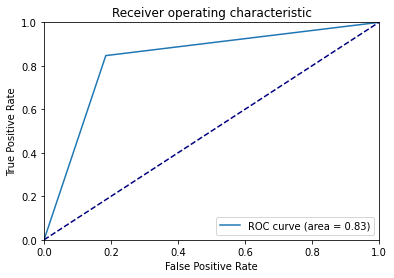

In [ ]:
#Result evaluation: Print ROC Curve
fpr,tpr,th = metrics.roc_curve(test_lab_21,y_pred)
# Sensitivty = TPR(True Positive Rate)= Recall = TP/(TP+FN)
# (1 - Specificity) = FPR(False Positive Rate)= FP/(TN+FP)
 
roc_auc = metrics.roc_auc_score(test_lab_21,y_pred)
from matplotlib import pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()